<a href="https://colab.research.google.com/github/Chachabeat/Dojo/blob/main/Titanic_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0. Problem definition

To accurately predict the survival of passengers on the Titanic.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1. Get data

In [ ]:
# Download data from Kaggle using Kaggle API
# !kaggle competitions download -c titanic


  0%|          | 0.00/34.1k [00:00<?, ?B/s]
100%|##########| 34.1k/34.1k [00:00<?, ?B/s]


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import os
os.listdir('gdrive/MyDrive/titanic')

['gender_submission.csv', 'test.csv', 'train.csv']

In [4]:
# Import training set
import pandas as pd

train = pd.read_csv('gdrive/MyDrive/titanic/train.csv')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Check basic summaries
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2. Sus out data / EDA

**Data dictionary**
![image.png](attachment:image.png)

**Variable Notes**

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

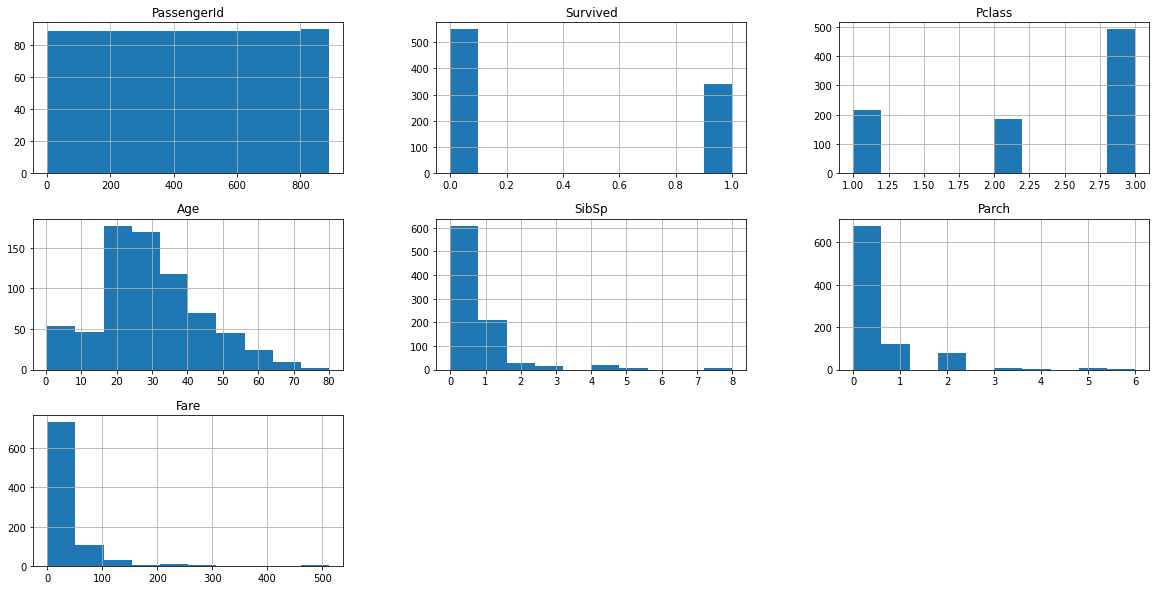

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10) # set default fig size

train.hist()

In [ ]:
# Look at correlations - Pclass and Fare look like stand-outs with Survived
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
train.Survived.value_counts()
train.Pclass.value_counts()
train.Sex.value_counts()
train.SibSp.value_counts()
train.Parch.value_counts()

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### 2. Prepare Data

Data preparation steps:
* Handle missing values
* Handle categorical features
* Scale numerical features

Methods:
1. ColumnTransformer
2. CustomTransformers with DFFeatureUnion

RobustScaler or StandardScaler?

In [ ]:
# Missing values
train.loc[train.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,S,C,Q


In [ ]:
train.loc[train.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
# Passenger class - keep as ordinal or one-hot encode?

In [ ]:
# Parch - 0 and >=1 - number - one hot encode

In [ ]:
train.Age[~train.Age.isna()]

0     -0.565419
1      0.663488
2     -0.258192
3      0.433068
4      0.433068
         ...   
886   -0.181385
887   -0.795839
888   -0.104579
889   -0.258192
890    0.202648
Name: Age, Length: 891, dtype: float64

In [5]:
# Age to be used in ColumnTransformer (extracts 'Age' as a series already)
from sklearn.base import BaseEstimator, TransformerMixin

class AgeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, standard_scale=True):
        self.standard_scale = standard_scale # set toggle for scaling or not
        
    def impute_na(self, X):
        X[X.isna()] = self.median # impute missing values with fitted median (from training data) - potentially group by Pclass
        return X
        
    def fit(self, X, y=None):
        self.median = X.median() # save median as class attribute

        if self.standard_scale:
            self.mean = X.mean() # fit mean and std from training data
            self.std = X.std()

        return self
            
    def transform(self, X):
        X = self.impute_na(X)
        
        if self.standard_scale:
            X = (X - self.mean)/self.std
            
        return pd.DataFrame(X, columns=['Age']) # as DF to fit ColTransformer reqt

In [ ]:
# bucket or scale fare

In [ ]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
# Transform Embarked to be used in ColumnTransformer (extracts 'Embarked' as a series already)

class EmbarkedTransformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    None
  
  def fit(self, X):
    self.mode = X.mode()[0] # get mode from training set
    return self

  def impute_na(self, X):
    X[X.isna()] = self.mode # impute missing values with mode - S
    return X

  def onehot(self, X):
    X_df = pd.DataFrame(X, columns=['Embarked'])
    X_df['S'] = X_df.Embarked.map({'S': 1, 'C': 0, 'Q': 0}) # one-hot encode
    X_df['C'] = X_df.Embarked.map({'S': 0, 'C': 1, 'Q': 0})
    X_df['Q'] = X_df.Embarked.map({'S': 0, 'C': 0, 'Q': 1})
    return X_df

  def transform(self, X):
    X = self.impute_na(X)
    X = self.onehot(X)
    X = X.drop('Embarked', axis=1)
    return X

In [ ]:
test = EmbarkedTransformer()
test.fit_transform(train.Embarked).describe()
# test.fit_transform(train.Embarked).loc[test.fit_transform(train.Embarked).S.isna()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,S,C,Q
count,891.000000,891.000000,891.000000
mean,0.725028,0.188552,0.086420
std,0.446751,0.391372,0.281141
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [7]:
# Define preparation pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_cols = ['Pclass', 'SibSp', 'Fare', 'Parch']
cat_cols = ['Sex']

prep_pipeline = ColumnTransformer([
    ('age', AgeTransformer(), 'Age'), # apply custom trans to Age
    ('num_cols', StandardScaler(), num_cols), # apply simple scaling to num cols
    ('embarked', EmbarkedTransformer(), 'Embarked'), # apply custom trans to Embarked
    ('cat_cols', OneHotEncoder(), cat_cols) # one hot encode Sex
    # ('do nothing', 'passthrough', ['Pclass'])
])

# Prepare features into training array
X_train = prep_pipeline.fit_transform(train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
prep_pipeline.transformers_

[('age', AgeTransformer(standard_scale=True), 'Age'),
 ('embarked', EmbarkedTransformer(), 'Embarked'),
 ('num_cols',
  StandardScaler(copy=True, with_mean=True, with_std=True),
  ['Pclass', 'SibSp', 'Fare', 'Parch']),
 ('cat_cols',
  OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  ['Sex']),
 ('remainder', 'drop', [0, 1, 3, 8, 10])]

In [ ]:
train.shape
X_train.shape

(891, 10)

In [8]:
# The order of the columns in the transformed feature matrix follows the order of how the columns are specified in the transformers list. 
# Those columns specified with passthrough are added at the right to the output of the transformers.
# One-hot encoded output looks like it's in alphabetical order

pd.DataFrame(X_train, columns=['Age', 'Pclass', 'SibSp', 'Fare', 'Parch','S', 'C', 'Q', 'Female', 'Male'])#.describe()

,Age,Pclass,SibSp,Fare,Parch,S,C,Q,Female,Male
0,-0.530005,0.827377,0.432793,-0.502445,-0.473674,1.0,0.0,0.0,0.0,1.0
1,0.571430,-1.566107,0.432793,0.786845,-0.473674,0.0,1.0,0.0,1.0,0.0
2,-0.254646,0.827377,-0.474545,-0.488854,-0.473674,1.0,0.0,0.0,1.0,0.0
3,0.364911,-1.566107,0.432793,0.420730,-0.473674,1.0,0.0,0.0,1.0,0.0
4,0.364911,0.827377,-0.474545,-0.486337,-0.473674,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,-0.185807,-0.369365,-0.474545,-0.386671,-0.473674,1.0,0.0,0.0,0.0,1.0
887,-0.736524,-1.566107,-0.474545,-0.044381,-0.473674,1.0,0.0,0.0,1.0,0.0
888,-0.116967,0.827377,0.432793,-0.176263,2.008933,1.0,0.0,0.0,1.0,0.0
889,-0.254646,-1.566107,-0.474545,-0.044381,-0.473674,0.0,1.0,0.0,0.0,1.0


In [ ]:
# Check transformation - OK!
train.iloc[0:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
# Define target vector
y_train = train['Survived']

### 3. Select Models

In [45]:
y_train.value_counts()/len(y_train) 

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [47]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42)
# cross_val_score(forest_clf, X_train, y_train, cv=3)
y_forest_pred = cross_val_predict(forest_clf, X_train, y_train, cv=5)

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_forest_pred)

array([[471,  78],
       [ 92, 250]])

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_forest_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       549
           1       0.76      0.73      0.75       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.80       891
weighted avg       0.81      0.81      0.81       891



In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'n_estimators': [120, 160, 200], 'max_features': [6, 7, 8]}
]

grid_search = GridSearchCV(forest_clf, param_grid, cv=5, 
                           scoring='f1', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [65]:
grid_search.best_params_

cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
  print(mean_score, params)

{'max_features': 7, 'n_estimators': 120}

0.7496764037748018 {'max_features': 6, 'n_estimators': 120}
0.7499025843573351 {'max_features': 6, 'n_estimators': 160}
0.7498422683781789 {'max_features': 6, 'n_estimators': 200}
0.7569004879096716 {'max_features': 7, 'n_estimators': 120}
0.7503776329083964 {'max_features': 7, 'n_estimators': 160}
0.7438041408094896 {'max_features': 7, 'n_estimators': 200}
0.7495402468830411 {'max_features': 8, 'n_estimators': 120}
0.751602199189765 {'max_features': 8, 'n_estimators': 160}
0.7519901064673704 {'max_features': 8, 'n_estimators': 200}


In [66]:
grid_search.best_estimator_.feature_importances_

array([0.24726834, 0.09650072, 0.0492863 , 0.24332231, 0.02629957,
       0.01638417, 0.01103783, 0.00653634, 0.14333501, 0.16002942])

In [67]:
# Fit Random Forest with tuned parameters
forest_clf = RandomForestClassifier(max_features=7, n_estimators=120, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

array([0.24726834, 0.09650072, 0.0492863 , 0.24332231, 0.02629957,
       0.01638417, 0.01103783, 0.00653634, 0.14333501, 0.16002942])

In [71]:
# Check in-sample metrics..
y_pred = forest_clf.predict(X_train)

confusion_matrix(y_train, y_pred)
print('\n',classification_report(y_train, y_pred))

array([[545,   4],
       [ 14, 328]])


               precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.99      0.96      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



In [79]:
# Check feature importance
sorted(zip(forest_clf.feature_importances_,
           ['Age', 'Pclass', 'SibSp', 'Fare', 'Parch','S', 'C', 'Q', 'Female', 'Male']),
       reverse=True)

[(0.24726834134619272, 'Age'),
 (0.24332230850626713, 'Fare'),
 (0.16002941573453772, 'Male'),
 (0.14333500939971916, 'Female'),
 (0.09650071654526274, 'Pclass'),
 (0.04928629680869308, 'SibSp'),
 (0.026299571423686545, 'Parch'),
 (0.01638417155705921, 'S'),
 (0.011037828881581701, 'C'),
 (0.0065363397970000705, 'Q')]

<Figure size 576x432 with 0 Axes>

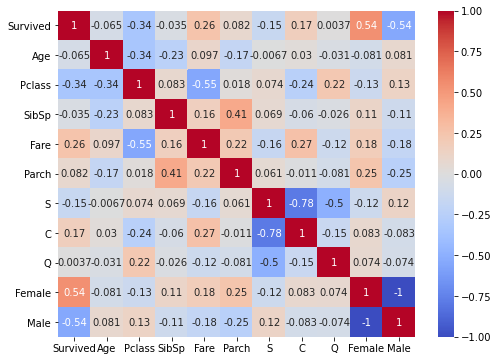

In [80]:
# Compare with correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6)) 
sns.heatmap(pd.concat([y_train, 
           pd.DataFrame(X_train, columns=['Age', 'Pclass', 'SibSp', 'Fare', 'Parch','S', 'C', 'Q', 'Female', 'Male'])], 
          axis=1).corr(),
          annot=True,
          cmap='coolwarm') # gender, Pclass look most important for Survived

In [81]:
## 2. Try GB
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
parameters = {'learning_rate':[0.01, 0.05, 0.1, 0.5, 1], 
              'min_samples_split':[2,5,10,20], 
              'max_depth':[2,3,5,10]}

grid_search = GridSearchCV(gbc, parameters, cv=5, 
                           scoring='f1', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [83]:
grid_search.best_params_

# cv_res = grid_search.cv_results_
# for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
#   print(mean_score, params)

{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2}

In [89]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)

parameters = {'penalty':['l2'], 
              'C':[0.01, 0.05, 0.3, 0.7, 1]}

grid_search = GridSearchCV(log_reg, parameters, cv=5, 
                           scoring='f1', return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.3, 0.7, 1], 'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

{'C': 0.05, 'penalty': 'l2'}

In [90]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
  print(mean_score, params)

0.6322072175611999 {'C': 0.01, 'penalty': 'l2'}
0.7191133283424284 {'C': 0.05, 'penalty': 'l2'}
0.7169552146556221 {'C': 0.3, 'penalty': 'l2'}
0.7136944542609375 {'C': 0.7, 'penalty': 'l2'}
0.7136944542609375 {'C': 1, 'penalty': 'l2'}


In [ ]:
## Build and train 1 layer NN
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', # 2 class classification
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10) # batch_size 

Epoch 1/10
28/28 [==============================] - 1s 2ms/step - loss: 0.6746 - accuracy: 0.5757
Epoch 2/10
28/28 [==============================] - 0s 1ms/step - loss: 0.6236 - accuracy: 0.6318
Epoch 3/10
28/28 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.6521
Epoch 4/10
28/28 [==============================] - 0s 1ms/step - loss: 0.5564 - accuracy: 0.7467
Epoch 5/10
28/28 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.7419
Epoch 6/10
28/28 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.7797
Epoch 7/10
28/28 [==============================] - 0s 1ms/step - loss: 0.5208 - accuracy: 0.7798
Epoch 8/10
28/28 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.8426
Epoch 9/10
28/28 [==============================] - 0s 1ms/step - loss: 0.4718 - accuracy: 0.8040
Epoch 10/10
28/28 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.8134


In [91]:
X_train.shape

(891, 10)

In [83]:
## Build and train 1 layer NN using k-fold CV (more number of data points)
from keras import models, layers, regularizers

def build_model(hidden_units=6):
  model = models.Sequential()
  model.add(layers.Dense(hidden_units, activation='relu', input_shape=(X_train.shape[1],)))
            # kernel_regularizer=regularizers.l2(0.001))) # try regularisation
  model.add(layers.Dropout(0.5)) # try dropout
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='rmsprop',
                loss='binary_crossentropy', # 2 class classification
                metrics=['accuracy', 'Precision', 'Recall'])
  return model

In [88]:
import numpy as np

# Set parameters for k-fold CV
k = 8
num_val_samples = len(X_train) // k
num_epochs = 25
hidden_units = 12
all_msqre = []
all_mabse = []
all_acc_histories = []
all_loss_histories = []
all_prec_histories = []
all_recall_histories = []

# Run k-fold CV
for i in range(k):
  print('processing fold #', i)
  # Split out kth fold for validation
  X_val = X_train[i*num_val_samples:(i+1)*num_val_samples]
  y_val = y_train[i*num_val_samples:(i+1)*num_val_samples]

  # Split out remaining data for training
  X_train_partial = np.concatenate(
      [X_train[:i*num_val_samples],
       X_train[(i+1)*num_val_samples:]],
       axis=0
  )
  y_train_partial = np.concatenate(
      [y_train[:i*num_val_samples],
       y_train[(i+1)*num_val_samples:]],
       axis=0
  )

  # Fit NN on partial training data
  model = build_model(hidden_units=hidden_units)
  history = model.fit(X_train_partial, y_train_partial,
                      validation_data=(X_val, y_val),
                      epochs=num_epochs, batch_size=10, verbose=0)
  acc_history = history.history['val_accuracy']
  all_acc_histories.append(acc_history) # mae over training epochs

  loss_history = history.history['val_loss']
  all_loss_histories.append(loss_history)

  prec_history = history.history['val_precision']
  all_prec_histories.append(prec_history)

  recall_history = history.history['val_recall']
  all_recall_histories.append(recall_history)

  # val_loss, val_acc, val_prec = model.evaluate(X_val, y_val, verbose=0) # gives values after all epochs
  

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7


In [ ]:
print("Weights and biases of the layers: \n")
for layer in model.layers:
  print(layer.name)
  print("Weights")
  print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
  print("Bias")
  print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')

In [ ]:
# 4 units 1 layer - achieves ~78% val acc over 20 epochs - 75% precision for 65% recall
# 8 units 1 layer - achieves ~80% val acc over 20 epochs - 78% precision for 70% recall
# 10 & 12 units 1 layer - not much improvement

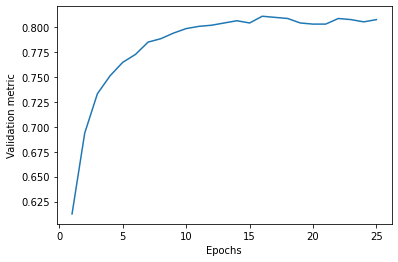

In [89]:
import matplotlib.pyplot as plt

def plot_training_history(all_histories):
  avg_history = [np.mean([x[i] for x in all_histories]) for i in range(num_epochs)]

  plt.plot(range(1, len(avg_history) + 1), avg_history)
  plt.xlabel('Epochs')
  plt.ylabel('Validation metric')

plot_training_history(all_acc_histories)

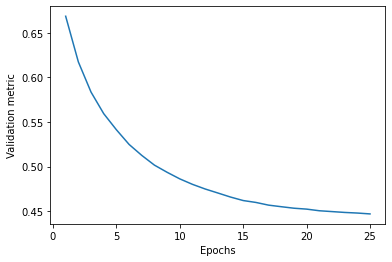

In [90]:
plot_training_history(all_loss_histories)

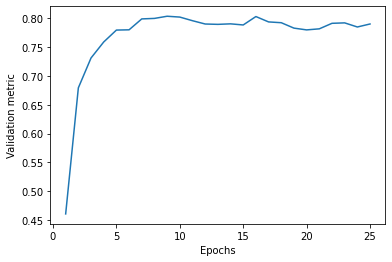

In [91]:
plot_training_history(all_prec_histories)

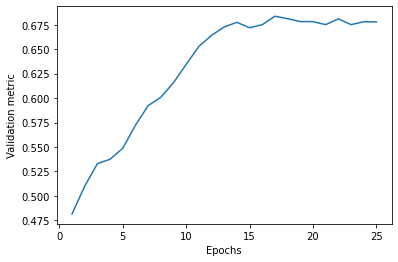

In [92]:
plot_training_history(all_recall_histories)

In [17]:
# 8-fold 10 units 1 layer
print(' Avg MAE:', np.mean(all_mabse),
      'Std MAE:', np.std(all_mabse), '\n',
      'Avg MSE:', np.mean(all_msqre),
      'Std MSE:', np.std(all_msqre))

 Avg MAE: 0.8018018081784248 Std MAE: 0.02206748025709064 
 Avg MSE: 0.4443003237247467 Std MSE: 0.03218294677460548


In [93]:
## Build and train 2 layer NN
from keras import models
from keras import layers

def build_model(hidden_units_1=6, hidden_units_2=6):
  model = models.Sequential()
  model.add(layers.Dense(hidden_units_1, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(layers.Dense(hidden_units_2, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='rmsprop',
                loss='binary_crossentropy', # 2 class classification
                metrics=['accuracy', 'Precision', 'Recall'])
  return model

In [109]:
import numpy as np

# Set parameters for k-fold CV
k = 8
num_val_samples = len(X_train) // k
num_epochs = 25
hidden_units_1 = 8
hidden_units_2 = 8

all_acc_histories = []
all_loss_histories = []
all_prec_histories = []
all_recall_histories = []

# Run k-fold CV
for i in range(k):
  print('processing fold #', i)
  # Split out kth fold for validation
  X_val = X_train[i*num_val_samples:(i+1)*num_val_samples]
  y_val = y_train[i*num_val_samples:(i+1)*num_val_samples]

  # Split out remaining data for training
  X_train_partial = np.concatenate(
      [X_train[:i*num_val_samples],
       X_train[(i+1)*num_val_samples:]],
       axis=0
  )
  y_train_partial = np.concatenate(
      [y_train[:i*num_val_samples],
       y_train[(i+1)*num_val_samples:]],
       axis=0
  )

  # Fit NN on partial training data
  model = build_model(hidden_units_1=hidden_units_1, hidden_units_2=hidden_units_2)
  history = model.fit(X_train_partial, y_train_partial,
                      validation_data=(X_val, y_val),
                      epochs=num_epochs, batch_size=100, verbose=0)
  acc_history = history.history['val_accuracy']
  all_acc_histories.append(acc_history) # mae over training epochs

  loss_history = history.history['val_loss']
  all_loss_histories.append(loss_history)

  prec_history = history.history['val_precision']
  all_prec_histories.append(prec_history)

  recall_history = history.history['val_recall']
  all_recall_histories.append(recall_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7


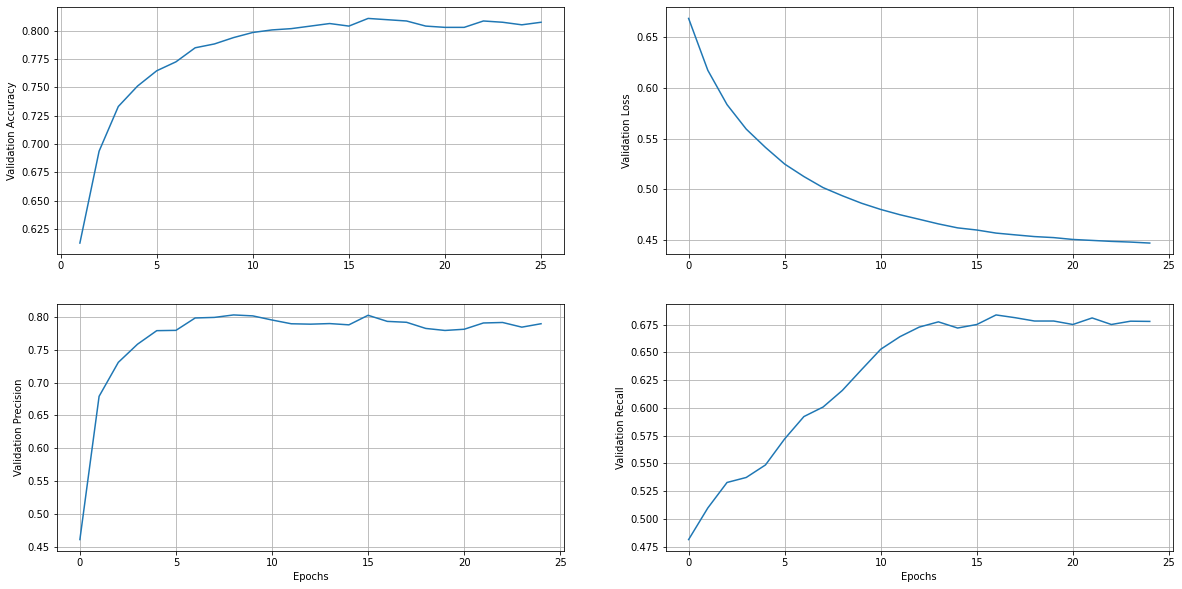

In [107]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10) # set default fig size

def plot_training_history(all_acc_histories, all_loss_histories, all_prec_histories, all_recall_histories):
  fig, axs = plt.subplots(nrows=2, ncols=2)

  avg_history1 = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
  avg_history2 = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
  avg_history3 = [np.mean([x[i] for x in all_prec_histories]) for i in range(num_epochs)]
  avg_history4 = [np.mean([x[i] for x in all_recall_histories]) for i in range(num_epochs)]

  axs[0,0].plot(range(1, len(avg_history1) + 1), avg_history1)
  axs[0,0].set_ylabel('Validation Accuracy')
  axs[0,0].grid(True)

  axs[0,1].plot(avg_history2)
  axs[0,1].grid(True)
  axs[0,1].set_ylabel('Validation Loss')

  axs[1,0].plot(avg_history3)
  axs[1,0].set_xlabel('Epochs')
  axs[1,0].set_ylabel('Validation Precision')
  axs[1,0].grid(True)

  axs[1,1].plot(avg_history4)
  axs[1,1].set_xlabel('Epochs')
  axs[1,1].set_ylabel('Validation Recall')
  axs[1,1].grid(True)

plot_training_history(all_acc_histories, all_loss_histories, all_prec_histories, all_recall_histories)

### 4. Compare Models

In [ ]:
# Assess ROC Curve
from sklearn.metrics import roc_curve

y_forest_prob = cross_val_predict(forest_clf, X_train, y_train, cv=5, method='predict_proba')
fpr, tpr, thresholds = roc_curve(y_train, y_forest_prob[:, 1])

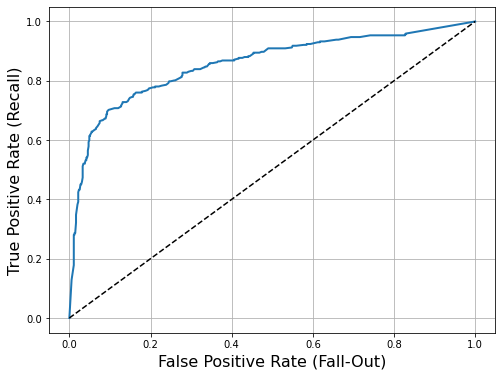

In [ ]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
  plt.grid(True)

plt.figure(figsize=(8, 6)) 
plot_roc_curve(fpr, tpr) # compare with other models, also tune hyp parameters